---
title: Roundoff and Truncation
venue: Modules
---

The one-sided finite difference scheme to approximate derivatives is defined as

:::{prf:definition} One-Sided Finite Difference
:label: def-osfd
$$
\begin{equation*}
f_h(x)=\frac{f(x+h)-f(x)}{h} \approx f'(x),
\end{equation*}
$$

where $h$ is the stepsize.
:::

If no roundoff error exists, then the accuracy of the scheme is determined solely by the truncation error:

$$
\begin{equation*}
  t(h)=|f'(x)-f_h(x)|=O(h)
\end{equation*}
$$

In the presence of roundoff errors, $x$ can not be represented exactly; instead, it is represented by the rounded value $\tilde{x}$ with the associated roundoff error:

$$
\begin{equation*}
  r=|\tilde{x}-x|.
\end{equation*}
$$

The total error of the finite difference approximation thus consists of both truncation error due to the scheme as well as the roundoff error:

$$
\begin{equation*}
  \epsilon(h):=|f'(x)-f_h(\tilde{x})|  = O(h) + r\cdot O(h^{-1})
\end{equation*}
$$

:::{important}
The truncation error decreases with decreasing step size $h$; however, the roundoff error increases with decreasing $h$.
:::

When $h$ is not too small, then the total error will decrease with smaller $h$. But when $h$ becomes small enough, the roundoff error will dominate the total error, which will start to increase.

**Task Description**

1. Define 3 functions, one to evaluate the original function $f=\sin(x)$, another one to calculate the exact derivative $f'$, and a third one to evaluate the finite difference approximation $f_h$ with step size $h$ at a fixed $x=x_0=1$.

2. Define an array $h$ of step sizes starting from 1e-16, increasing by factor 10 to each preceding value, until reaching $h=0.1$. Calculate the array consisting of errors between the finite difference approximataion $f_h$ and the exact derivative $f'$.

3. Plot the approximation error as a function of the step size $h$. Display your plot in log format.

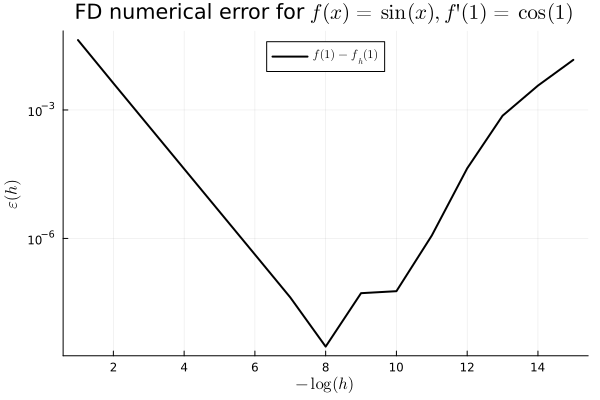

In [1]:
using Plots, LaTeXStrings

function f(x::Float64)
  return sin.(x);
end

function f_derivative(x::Float64)
#exact derivative
    return cos.(x);
end

function f_fd_1(h::Float64)
    #finite difference derivative
  return (f.(1+h)-f(1.0))./h;
end

n=(1:15)
h=10.0 .^ -n

#Plot FD approxmation error in log plot, set line style, and place legend
Plots.plot(n,abs.(f_fd_1.(h) .-f_derivative.(1.0)),
    yaxis=:log,
    label=L"f(1)-f_h(1)",
    lc=:black, lw=2)

Plots.plot!(legend=:top)
Plots.title!(L"FD numerical error for $f(x)=\sin(x), f'(1)=\cos(1)$")
xlabel!(L"-\log(h)")
ylabel!(L"\epsilon(h)")
